**Name:** Alireza Farajtabrizi  

**Student Number:** 403206554




# Neural-Network with Numpy

In this notebook, you are going to write and implement all the components required to create and train a two-layered neural network using NumPy.

## Imports & Seeding:

Importing some common libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)
%matplotlib inline

## Preparing the data

You'll train and evaluate your model on [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST) dataset. In this section, you'll download Fashion MNIST and split it into training and testing datasets.

In [2]:
from sklearn.datasets import fetch_openml

# Using `fetch_openml`, download `Fashion-MNIST` 
# and save the training data and labels in `X` and `y` respectively.
#############################
# Your code goes here (5 points)
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)
X = fashion_mnist.data
y = fashion_mnist.target    
#############################

# Normalization:
X = ((X / 255.) - .5) * 2

print(X.shape, y.shape)

(70000, 784) (70000,)


In [3]:
from sklearn.model_selection import train_test_split

# Using `train_test_split`, split your data into two sets. 
# Set the test_size to 10000

#############################
# Your code goes here (6 points)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
#############################

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


## Prepare training & validation sets

We'll use only 3 classes from Fashion MNIST: Trouser, T-shirt, and Sneaker classes.

The class labels for T-shirt, Trouser, and Sneaker are 0, 1, and 7 respectively.

In this part, you'll limit the testing and training sets to only these three classes.

In [4]:
# Modify `y_train` and `x_train`.
# Only keep the 3 classes mentioned above. 
#############################
# Your code goes here (4 points)
classes_to_keep = ['0', '1', '7']

mask = np.isin(y_train, classes_to_keep)

x_train = x_train[mask]
y_train = y_train[mask]
y_train = np.array(y_train, dtype=int)
y_train[y_train==7]=2
#############################

print(x_train.shape, y_train.shape)

(18022, 784) (18022,)


In [5]:
# Modify `y_test` and `x_test`.
# Only keep the 3 classes mentioned above. 
#############################
# Your code goes here (4 points)
classes_to_keep = ['0', '1', '7']

mask = np.isin(y_test, classes_to_keep)

x_test = x_test[mask]
y_test = y_test[mask]
y_test = np.array(y_test, dtype=int)
y_test[y_test==7]=2
#############################

print(x_test.shape, y_test.shape)

(2978, 784) (2978,)


## Linear & Activation Functions

In this part, you'll implement the forward and backward process for the following components:
- Softmax Layer
- Linear Layer
- ReLU Layer
- Sigmoid Layer

### The `Softmax` Layer

In [6]:
class SoftMaxLayer(object):
    def __init__(self):
        self.inp = None
        self.output = None

    def forward(self, x):
        # Write the forward pass for softmax.
        # Save the values required for the backward pass.
        #############################
        # Your code goes here (4 points)
        self.inp = x
        exp_x = np.exp(x)
        self.output = exp_x / np.sum(exp_x, axis=1, keepdims=True)
        #############################
        return self.output

    def backward(self, up_grad):
        # Write the backward pass for softmax.
        #############################
        # Your code goes here (4 points)
        batch_size = self.output.shape[0]
        grad = np.zeros_like(up_grad)
        
        for i in range(batch_size):
            y = self.output[i].reshape(-1, 1)
            jacobian = np.diagflat(y) - np.dot(y, y.T)
            grad[i] = np.dot(jacobian, up_grad[i])
            
        return grad
        #############################

    def step(self, optimizer):
        pass

### The `Linear` Layer 

In [7]:
class Linear:
    def __init__(self, in_dim, out_dim):
        # Initialize the layer's weights and biases
        #############################
        # Your code goes here (2 points)
        self.w = np.random.randn(out_dim, in_dim) * 0.1
        self.b = np.zeros((1, out_dim))  
        #############################
        self.dw = None
        self.db = None
        
    def forward(self, inp):
        # Compute linear layer's output.
        # Save the value(s) required for the backward phase.
        #############################
        # Your code goes here (4 points)
        self.inp = inp  
        z = np.dot(self.inp, self.w.T) + self.b 
        #############################
        return z
    
    def backward(self, up_grad):
        # Calculate the gradient with respect to the weights 
        # and biases and save the results.
        #############################
        # Your code goes here (6 points)
        self.dw = np.dot(up_grad.T, self.inp)
        self.db = np.sum(up_grad, axis=0, keepdims=True)
        down_grad = np.dot(up_grad, self.w)
        #############################
        return down_grad

    def step(self, optimizer):
        # Update the layer's weights and biases
        # Update previous_w_update and previous_b_update accordingly
        #############################
        # Your code goes here (5 points)]
        self.previous_w_update = self.w
        self.previous_b_update = self.b

        self.w = optimizer.get_next_update(self.w, self.dw)
        self.b = optimizer.get_next_update(self.b, self.db)
        
        self.previous_w_update = self.w - self.previous_w_update
        self.previous_b_update = self.b - self.previous_b_update
        #############################

### The `ReLU` Layer

In [8]:
class RelU:
    def __init__(self):
        self.inp = None

    def forward(self, inp):
        # Write the forward pass for ReLU.
        # Save the value(s) required for the backward pass.
        #############################
        # Your code goes here (4 points)
        self.inp = inp

        output = np.maximum(0, inp)
        #############################
        return output
    
    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        down_grad = np.zeros_like(up_grad)
        down_grad[self.inp > 0] = up_grad[self.inp > 0]
        #############################
        return down_grad

    def step(self, optimizer):
        pass

### The `sigmoid` Layer

In [9]:
class Sigmoid:
    def forward(self, inp):
        #############################
        # Your code goes here (4 points)
        self.out = 1 / (1 + np.exp(-inp))
        #############################
        return self.out
    
    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        down_grad = up_grad * (self.out * (1 - self.out))
        #############################
        return down_grad
    
    def step(self, optimizer):
        pass

## `Loss` function :

For this task we are going to use the [Cross-Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy).

In [10]:
class CELoss():
    def __init__(self):
        pass

    def forward(self, pred, target):
        
        self.yhat = pred
        self.y = target
        m = self.y.shape[0]
        # Commpute and return the loss 
        #############################
        # Your code goes here (8 points)
        gathered_probs = pred[self.y==1]
        loss = -np.mean(np.log(gathered_probs + 1e-15))
        return loss
        #############################
        
    
    def backward(self):
        # Derivative of loss_fn with respect to a the predicted label.
        # Use `self.y` and `self.yhat` to compute and return `grad`.
        #############################
        # Your code goes here (6 points)
        m = self.y.shape[0]
        grad = np.zeros_like(self.yhat)
        
        grad[self.y==1] = -1 / (self.yhat[self.y==1] + 1e-15)
        grad = grad / m
        #############################
        return grad

## Optimizer

In this section, you'll implement an optimizer classes


In [11]:
class GradientDescent(object):
    def __init__(self, lr):
        self.lr = lr

    def get_next_update(self, x, dx):
        # Compute the new value for 'x' and return the result
        #############################
        # Your code goes here (2 points)
        x = x - self.lr * dx
        return x
        #############################

## The Model
Now you'll write the base class for a multi-layer perceptron network.

In [12]:
class MLP:
    def __init__(self, layers, loss_fn, optimizer):
        self.layers = layers 
        self.losses  = [] 
        self.loss_fn = loss_fn
        self.optimizer = optimizer

    def forward(self, inp):
        # Pass `inp` to all the layers sequentially
        # and return the result.
        #############################
        # Your code goes here (4 points)
        for layer in self.layers:
            inp = layer.forward(inp)
        return inp
        #############################
        
    
    def loss(self, pred, label):
        loss = self.loss_fn.forward(pred, label)
        self.losses.append(loss)
        return loss

    def backward(self):
        # Start with loss function's gradient and 
        # do the backward pass on all the layers.
        #############################
        # Your code goes here (5 points)
        grad = self.loss_fn.backward()  
        for layer in reversed(self.layers):
            grad = layer.backward(grad)
        #############################
        
    def update(self):
        for layer in self.layers:
            layer.step(self.optimizer)
            

The following cell encodes training labels into a one-hot representation with 3 classes.

In [13]:
def onehot_enc(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, int(val)] = 1
    return ary

y_train = onehot_enc(y_train, 3)

In [14]:
def train(model, epochs, x, y):
    for n in range(epochs):
        # First do the forward pass. Next, compute the loss.
        # Then do the backward pass and finally, update the parameters.
        #############################
        # Your code goes here (4 points)
        y_pred = model.forward(x)
        loss = model.loss(y_pred, y)
        model.backward()
        model.update()
        #############################
        print(f"Loss at {n}: {loss:.3f}")

In [18]:
# Instantiate the `MLP` with the following structure:
#     Linear with 50 units --> ReLU --> Linear with 50 units --> ReLU --> Linear with 3 units --> Sigmoid --> Softmax
# Use GradientDescent as the optimizer, set the learning rate to 0.001, and use CELoss as the loss function.
#############################
# Your code goes here (4 points)
np.random.seed(42)
layers = [
            Linear(x_train.shape[1],50),
            RelU(),
            Linear(50,50),
            RelU(),
            Linear(50,3),
            Sigmoid(),
            SoftMaxLayer()]

nn = MLP(layers, CELoss(), GradientDescent(0.1))
#############################

epochs = 100

# Train the network using only `x_train` and `y_train` (no validation)
train(nn, epochs, x_train, y_train)

Loss at 0: 1.104
Loss at 1: 1.077
Loss at 2: 1.051
Loss at 3: 1.027
Loss at 4: 1.004
Loss at 5: 0.981
Loss at 6: 0.958
Loss at 7: 0.934
Loss at 8: 0.910
Loss at 9: 0.886
Loss at 10: 0.863
Loss at 11: 0.842
Loss at 12: 0.822
Loss at 13: 0.804
Loss at 14: 0.788
Loss at 15: 0.774
Loss at 16: 0.761
Loss at 17: 0.749
Loss at 18: 0.738
Loss at 19: 0.728
Loss at 20: 0.719
Loss at 21: 0.711
Loss at 22: 0.704
Loss at 23: 0.697
Loss at 24: 0.691
Loss at 25: 0.685
Loss at 26: 0.680
Loss at 27: 0.675
Loss at 28: 0.670
Loss at 29: 0.666
Loss at 30: 0.662
Loss at 31: 0.658
Loss at 32: 0.655
Loss at 33: 0.652
Loss at 34: 0.649
Loss at 35: 0.646
Loss at 36: 0.643
Loss at 37: 0.641
Loss at 38: 0.638
Loss at 39: 0.636
Loss at 40: 0.634
Loss at 41: 0.632
Loss at 42: 0.630
Loss at 43: 0.628
Loss at 44: 0.626
Loss at 45: 0.625
Loss at 46: 0.623
Loss at 47: 0.622
Loss at 48: 0.620
Loss at 49: 0.619
Loss at 50: 0.618
Loss at 51: 0.617
Loss at 52: 0.615
Loss at 53: 0.614
Loss at 54: 0.613
Loss at 55: 0.612
Lo

Let's plot the loss value for each iteration

Text(0, 0.5, 'Loss')

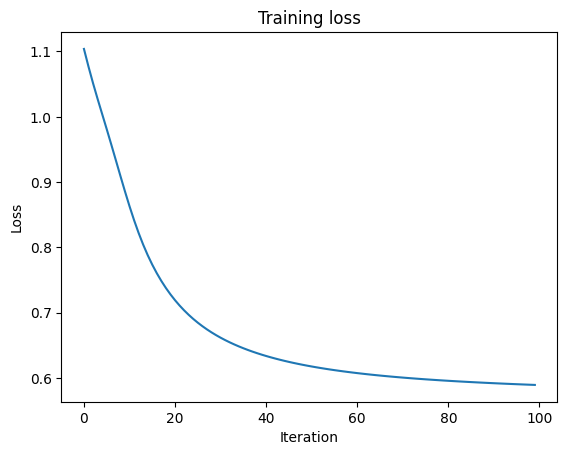

In [19]:
plt.plot(nn.losses)
plt.title("Training loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")

**Let's also check our model's performance using the `accuracy` metric on the `testing` dataset**

In [20]:
# Compute the accuracy on the testing set
#############################
# Your code goes here (7 points)
y_test_pred = nn.forward(x_test).argmax(axis=1)
acc = np.count_nonzero(y_test_pred == y_test)/len(y_test)
#############################

print(acc)

0.9754869039623909
